# Predicting Minecraft Players' Newsletter Subscription Status Using Age and Played Hours
**By: Tima Komarov (82239450), Carmen Wen (95556593), Pim-on Ingkanisorn(44803013), Omar Harb (57845414)**
<br>

In [389]:
library(tidyverse)
library(repr)
library(tidymodels)

# Introduction
The UBC Computer Science research group, led by Frank Wood, set up a MineCraft server to collect in-game data on player behaviours. The recorded data will be used in this study to explore factors that influence players' engagement, specifically focusing on which characteristics and behaviours predict a player's likelihood of subscribing to the game's newsletter. 

For this study, we aim to answer the broad question: "What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?" More specifically, **can the number of hours played and the players age predict if a player subscribes to a game related newsletter in the players data set?** This question is significant to explore because understanding player behaviors can be applied to gaming companies that use player data for marketing or engagement strategies.

We would do this by using the `players.csv` dataset, which contains 7 variables (`experience`, `subscribe`, `hashedEmail`, `played_hours`, `name`, `gender`, `Age`) and 196 observations. However, for our analysis, only played_hours, and Age will be utilized to develop a predictive model using k-nearest neighbours for subscription likelihood.

| Variable Name  | Type        | Description |
|---------------|------------|-------------|
| played_hours| Numeric     | Total hours played |
| Age         | Numeric     | Player’s age (8 to 50 years) |
| subscribe   | logical     | subscription status (TRUE/FALSE) |
<p style="text-align: center; font-style:italic">Figure 1 - Variables used in the data analysis</p>

We hypothesis that a player's played_hours and Age be used as predictors of their subscription status.


# Methods

To investigate whether a player’s age and total played hours predict their likelihood of subscribing to a game-related newsletter, we used a model to analyse the player dataset using the K-Nearest Neighbors (KNN) classification model. Our approach also included data visualization to explore the data set and improve our model as well as to get any insight into the dataset.

**Data Wrangling**

We worked with the `players.csv` dataset, which includes base characteristics of players on a Minecraft server. For our analysis, we focused on three variables:

- `subscribe` (logical): Whether the player is subscribed to the newsletter
- `played_hours` (numeric): Total hours played
- `Age` (numeric): Player’s age


We kept only these variables (they are the only ones relevant to our question) and removed all rows containing missing values (NA). The subscribe variable was converted to a factor, as required for classification, while the other variables remained unchanged.

**Data Visualization and Exploration**

To better understand our dataset and how each variable might contribute to predicting subscription status, we created several visualizations:

- Scatter Plot (Played Hours vs. Age, Colored by Subscription):
    This graph visualized how total hours played and age are distributed across subscribers and non-subscribers. It allowed us to visually inspect potential patterns, which is important for distance-based models like KNN.
- Bar Plot of Players’ Subscription Status:
      This bar plot confirmed our use of a majority classifier as our baseline. We would use this baseline as a key tool when assessing the success of our model in comparison to randomly guessing.  
- Bar Plots of Mean Age and Played Hours by Subscription Status:
    Two bar plots displayed the mean age and mean played hours for both subscribed and non-subscribed players. These helped us determine if there were noticeable differences in averages between the two groups. The goal was to see if either variable alone could be used as an indicator through seeing if there was a pattern in their means.

These visualizations helped assess whether the predictors were a good choice for modeling and provided initial support for our hypothesis that age and playtime can be used as predictors for newsletter subscription.

**Data Splitting**

The cleaned dataset was split into:
- Training set (80%)
- Testing set (20%)

We used the 80–20 split as it gives our model a larger data set to be trained with a slightly smaller test set. It is also within the typical ranges used for KNN models. 

**Modeling and Cross-Validation**

We used a K-Nearest Neighbors classification model using the tidymodels package in R. Since KNN relies on distance calculations, we centered and scaled all numeric predictors using `step_center()` and `step_scale()` within our recipe.

To tune the number of neighbors (k), we used 10-fold cross-validation (v = 10), as the data set is relatively small letting us use a larger number of folds. We tested k values from 1 to 10 and selected the value (k = 7) that yielded the highest accuracy.


**Baseline Accuracy Calculation** 

To give us a baseline to compare our model with, we used the majority classifier as said baseline statistic.  

$$Majority \ Classifier = \frac{Majority \ Class \ Count}{Total \ Number \ of \ Observations}$$


Giving us the baseline percentage of 73% which we will be using as the baseline to compare our model with.


**Model Evaluation**

After identifying the best k-value (k = 7), we trained a final model on the full training set and tested it on the holdout test set. The final model achieved an accuracy of 67.5%, which is lower than the random baseline. This rejects our hypothesis that age and played hours are useful predictors of newsletter subscription status.


# Procedure

**Data Wrangling**

In [390]:
players <- read_csv("https://raw.githubusercontent.com/crmnwn06/minecraft-data/refs/heads/main/players.csv" )

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [391]:
clean_player <- players |> 
    select(subscribe , played_hours , Age) |>
    mutate(subscribe = as_factor(subscribe)) |>
    na.omit()
head(clean_player)

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


*Figure 2 - Clean dataset with the `subscribe`, `played_hours`, and `Age` variables*

**Finding Baseline**

In [392]:
baseline <- clean_player |>
    group_by(subscribe) |>
    summarize(Count = n()) |>
    mutate(Percent = Count / nrow(clean_player)) |>
    mutate(Percent = 100 * Percent)
baseline

subscribe,Count,Percent
<fct>,<int>,<dbl>
FALSE,52,26.80412
TRUE,142,73.19588


Our baseline is 73.2% and is using majority classifier when subscribe = TRUE.

# Visualization of data

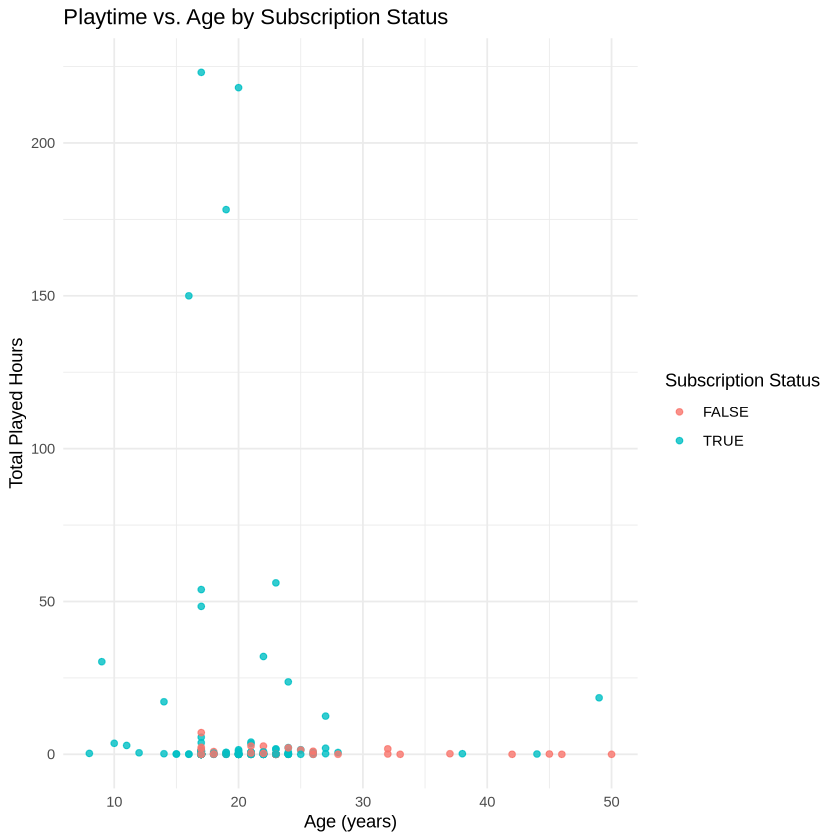

In [393]:
#Scatter Plot of Playtime vs. Age (Colored by Subscription Status)
ggplot(clean_player, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(alpha = 0.8) +
  labs(
    title = "Playtime vs. Age by Subscription Status",
    x = "Age (years)",
    y = "Total Played Hours",
    color = "Subscription Status"
  ) +
  theme_minimal()

*Figure 3 - Scatter Plot of Playtime vs. Age (Coloured by Subscription Status)*

The above scatter plot visualizes the relationship between playtime and age with subscription to give us an idea of how to approach the study. This graph reveals that most of the players are under the age of 30. Subscription players are more common among people with higher play hours and younger ages, while non-subscribed players are common among players with lower play hours and players with older ages. This visualization shows that these 2 factors have the potential to be the predictors for subscription status. 

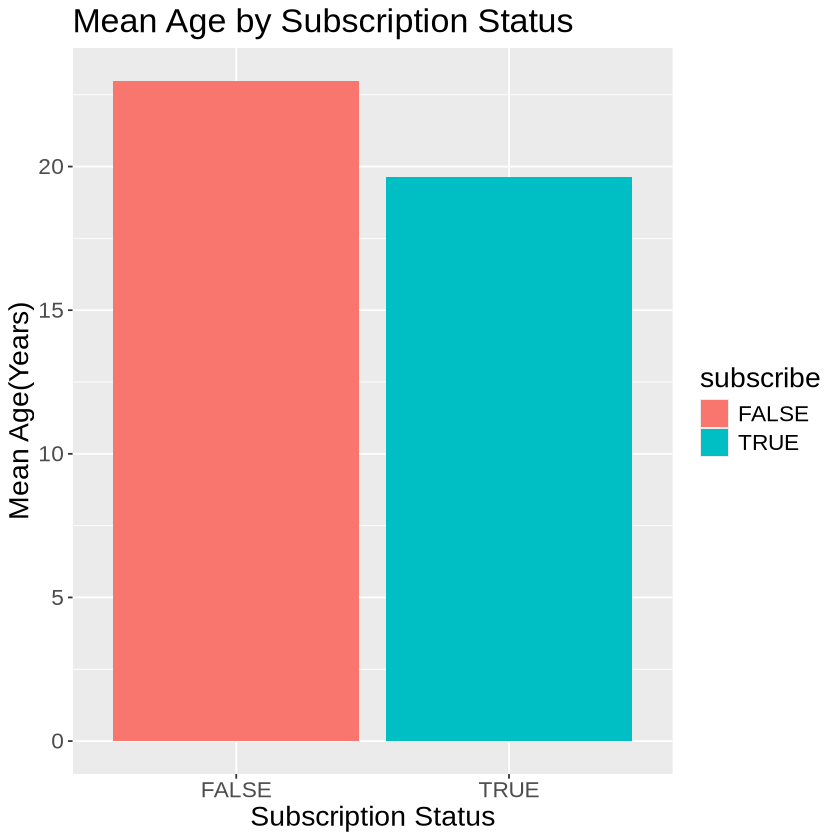

In [394]:
means <- clean_player |>
  group_by(subscribe) |>
  summarise(mean_age = mean(Age),
            mean_hours = mean(played_hours))

age_plot <- means|>
            ggplot(aes(x = subscribe, y = mean_age, fill=subscribe)) +
              geom_bar(stat="identity") +
              labs(title = "Mean Age by Subscription Status",
               x = "Subscription Status",
               y = "Mean Age(Years)") +
            theme(text=element_text(size=17))
age_plot

*Figure 4 - A bar plot of Mean Ages vs Subscription status*

Non-subscibed players have slightly higher mean age compared to the subscribed ones. This indicates that age plays a factor in determining of a player subscribes to a game-related newsletter, which relates to our question.

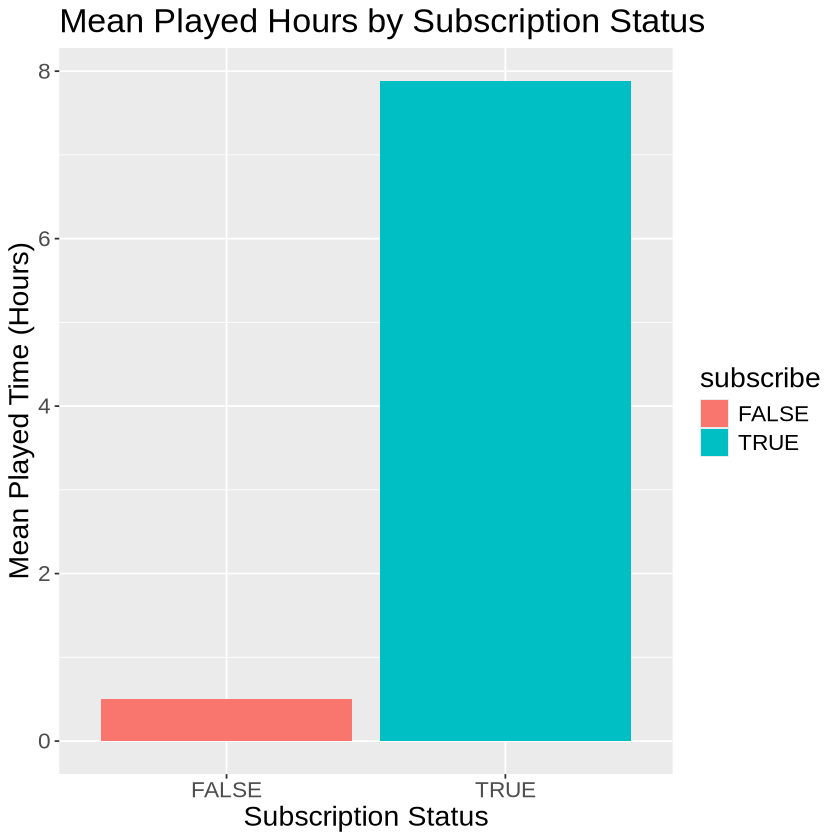

In [395]:
played_hours_plot <- means|>
            ggplot(aes(x = subscribe, y = mean_hours, fill=subscribe)) +
            geom_bar(stat = "identity") +
            labs(title = "Mean Played Hours by Subscription Status",
            x = "Subscription Status",
            y = "Mean Played Time (Hours)") +
            theme(text=element_text(size=17))

played_hours_plot

*Figure 5 - A bar graph of played time vs subscription status*

Players who are subscribed have significantly higher playtime compared to non-subscribers, so playtime could influence if a player subscribes to a game-related newsletter, which is relavent to our question.

Figures 4 and 5 demonstrate that play time has a stronger relationship with subscription status than age does. To avoid biased model performance, these 2 factors should be scaled before being used in the prediction model. This will allow both predictors to contribute equally.

**Data Analysis**

Here, the data is split into the training set (`player_train`) and the testing set (`player_test`). We choose to use 80% of the initial data as the training set and 20% as the testing set, as per general practice.

In [396]:
set.seed(2025)
player_split <- initial_split(clean_player, prop = 0.8, strata = subscribe)
player_train <- training(player_split)
player_test <- testing(player_split)

A classifcation model is specified. The recipe labels the `subscribe` variable as the response variable, and the `played_hours` and `Age` variable as the predictor variables. The intention is to find the best K-value to maximize accuracy for our final classification model. We then tune our model to find the best K value.

In [397]:
spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [398]:
recipe <- recipe(subscribe ~ ., data = player_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

In [399]:
ks1 <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

In [400]:
foldten <- vfold_cv(player_train, v = 10, strata = subscribe)

In [401]:
knn_results <- workflow() |>
    add_recipe(recipe) |>
    add_model(spec) |>
    tune_grid(resamples = foldten, grid = ks1) |>
collect_metrics()


**#accuracies and visualizing best k value


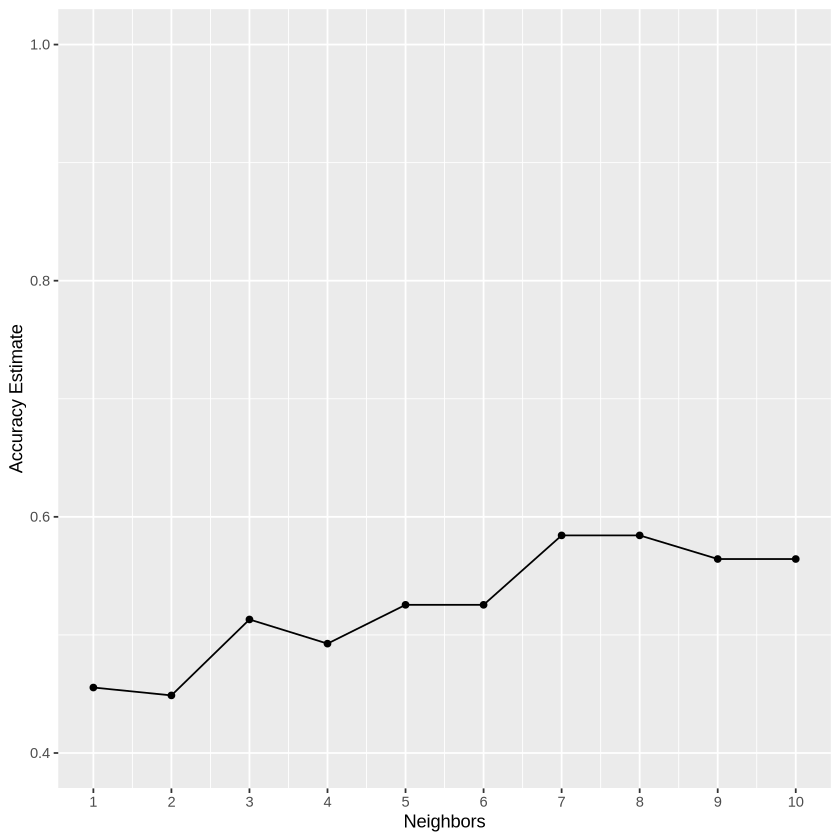

In [402]:
#accuracies and visualizing best k value
accuracies <- knn_results |>
filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) + 
       scale_y_continuous(limits = c(0.4, 1.0))
accuracy_versus_k

*Figure 6 - Line plot of accuracy versus k to find the best k-value*

A k-value of 7 was chosen since it has the highest accuracy. In our model, we used 7 neighbours (k = 7) to predict the subscription status. This k was used because of the small size of this dataset (194 observations after dropping NA values); the limit range of k was then limited to 1 to 10 as to not have a K that does not use an overly large portion of the sample. Using large k with such a small dataset would likely lead to underfitting within the model, although we previously found that k = 19 yields the highest accuracy from a similar graph to figure 6. To improve the model performance and allow for more optimal k, we would need a bigger dataset to allow us to pick a larger K without using an overly large part of the sample. 

In [383]:
#This code determines the best k value
best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    select(neighbors) |>
    pull(neighbors)
best_k

[1] 7

In [384]:
#resampling
resample_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

In [385]:
recipe2 <- recipe(subscribe ~ ., data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [386]:
resample_fit <- workflow() |>
  add_recipe(recipe2) |>
  add_model(resample_tune) |>
  fit(data = player_train)

In [387]:
#metrics 
player_predict <- predict(resample_fit, player_test) |>
  bind_cols(player_test)

In [388]:
player_predict |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.675


*Figure 7 - Accuracy of the model*

This shows that our prediction model yields 67.5% accuracy.

# Results 
Using k=7, we found that our model has an accuracy of 0.675, meaning that the model correctly classifies only 67.5% of the time. Given that random guessing accuracy is ~73%, we can say that the KNN model is worse at predicting a person's subscription status based on age and total played hours then randomly guessing.

# Discussion

We cannot conclude that playtime and age are indicative of subscription status to the game’s newsletter. While our model was unsuccessful in being more accurate as opposed to randomly guessing the analysis using the graphs and the model does provide some insight into the data. Playtime still has a relation to subscription status; we can conclude this through figure 5 and the significantly higher average playtime of subscribers to the newsletter. When combining playtime and age within a prediction model though, they don’t seem to be valid indicators of subscription status to a newsletter. Our hypothesis was disproven. 

We were surprised with these findings as we were expecting our model to at least match or slightly outperform random guessing. It could be the case that only one of the variables we used is a valid predictor, with the other variable hampering the ability of said variable to serve as a valid predictor within our model. Regardless of what could have caused the outcome, we can still gain insight from our work. An important finding can be found within figure 5 and how high playtime seems to be related with subscription status to the newsletter. We can also conclude that to make an accurate model (or any inferential analysis), more data would be needed. The data we did have was incredibly varied as figure 3 indicated with several large outliers in terms of playtime and age. 

Findings within our study could be used to increase subscription status as it was found that subscribers tend to have higher playtime on the server. Players could be prompted to subscribe to the newsletter after hitting a certain level of playtime on the server thus prompting us to explore how said change impact subscription status.

There are also several sources of bias, such as the survey being voluntary, and a player's age being self-reported. These sampling biases and missing data contribute to the overall limitations of this dataset that impacted our analysis. 

Future questions can explore how other variables within the dataset can (isolated and in combination with other variables) predict subscription status, exploring potentially what predictors the best is to create the most accurate predictive model. Other questions might include, how average playtime impacts subscription status, or how does the pattern of play time impact subscription?

# References
Timbers, Tiffany, et al. *Data Science: A First Introduction*. 2024, https://datasciencebook.ca.

Wood, Frank. *Minecraft Player and Session Dataset*. Collected by the UBC Computer Science Research Group. Provided in DSCI 100 course materials, 2025. Unpublished dataset.